In [1]:
# LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam



In [2]:
# Dataset

df = pd.read_csv(r"C:\Users\Daniel Nohava\Downloads\LABORATORIO_PARTE_1  AUTO2\Alzheimer's Disease Dataset\alzheimers_disease_data.csv")
df 


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# Información del dataset

**TABLA DE CONTENIDOS**

| Secciones |
|---------|
| 1. Patient Information (Información del paciente): Patient ID, Demographic Details, Lifestyle Factors|
| 2. Medical History (Historial médico) |
| 3. Clinical Measurements (Mediciones clínicas) |
| 4. Cognitive and Functional Assessments (Evaluaciones cognitivas y funcionales) |
| 5. Symptoms (Síntomas) |
| 6. Diagnosis Information (Información de diagnóstico) |
| 7. Confidential Information (Información confidencial) |

**1.1. Patient Information (Información del paciente)**

| Variable   | Descripción |
|------------|----------------------------|
| PatientID  | Identificador único asignado a cada paciente, rango 4751–6900 |

**1.2. Demographic Details (Detalles demográficos)**

| Variable       | Descripción |
|----------------|----------------------------|
| Age            | Edad del paciente: 60–90 años|
| Gender         | Género del paciente: 0 = Male, 1 = Female |
| Ethnicity      | Etnicidad: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other |
| EducationLevel | Nivel de educación: 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher |

**1.3. Lifestyle Factors (Factores del estilo de vida)**

| Variable           | Descripción |
|--------------------|-------------|
| BMI                | Índice de masa corporal: 15–40 |
| Smoking            | Estado de fumador: 0 = No, 1 = Sí |
| AlcoholConsumption | Consumo semanal de alcohol (en unidades): 0–20 |
| PhysicalActivity   | Actividad física semanal (horas): 0–10 |
| DietQuality        | Puntuación de calidad de la dieta: 0–10 |
| SleepQuality       | Puntuación de calidad del sueño: 4–10 |

**2. Medical History (Historial médico)**

| Variable              | Descripción |
|-----------------------|-------------|
| FamilyHistoryAlzheimers | Antecedentes familiares de Alzheimer: 0 = No, 1 = Sí |
| CardiovascularDisease | Presencia de enfermedad cardiovascular: 0 = No, 1 = Sí |
| Diabetes              | Presencia de diabetes: 0 = No, 1 = Sí |
| Depression            | Presencia de depresión: 0 = No, 1 = Sí |
| HeadInjury            | Antecedente de lesión en la cabeza: 0 = No, 1 = Sí |
| Hypertension          | Presencia de hipertensión: 0 = No, 1 = Sí |

**3. Clinical Measurements (Mediciones clínicas)**

| Variable               | Descripción |
|------------------------|-------------|
| SystolicBP             | Presión arterial sistólica: 90–180 mmHg |
| DiastolicBP            | Presión arterial diastólica: 60–120 mmHg |
| CholesterolTotal       | Colesterol total: 150–300 mg/dL |
| CholesterolLDL         | Colesterol LDL (lipoproteínas de baja densidad): 50–200 mg/dL |
| CholesterolHDL         | Colesterol HDL (lipoproteínas de alta densidad): 20–100 mg/dL |
| CholesterolTriglycerides | Triglicéridos: 50–400 mg/dL |

**4. Cognitive and Functional Assessments (Evaluaciones cognitivas y funcionales)**

| Variable             | Descripción |
|----------------------|-------------|
| MMSE                 | Puntuación del Mini-Mental State Examination: 0–30 (puntuaciones bajas = deterioro cognitivo) |
| FunctionalAssessment | Puntuación de evaluación funcional: 0–10 (puntuaciones bajas = mayor deterioro) |
| MemoryComplaints     | Presencia de quejas de memoria: 0 = No, 1 = Sí |
| BehavioralProblems   | Presencia de problemas de conducta: 0 = No, 1 = Sí |
| ADL                  | Actividades de la vida diaria: 0–10 (puntuaciones bajas = mayor deterioro) |

**5. Symptoms (Síntomas)**

| Variable                 | Descripción |
|--------------------------|-------------|
| Confusion                | Presencia de confusión: 0 = No, 1 = Sí |
| Disorientation           | Presencia de desorientación: 0 = No, 1 = Sí |
| PersonalityChanges       | Presencia de cambios de personalidad: 0 = No, 1 = Sí |
| DifficultyCompletingTasks| Presencia de dificultad para completar tareas: 0 = No, 1 = Sí |
| Forgetfulness            | Presencia de olvido: 0 = No, 1 = Sí |

**6. Diagnosis Information (Información de diagnóstico)**

| Variable  | Descripción |
|-----------|-------------|
| Diagnosis | Estado de diagnóstico de Alzheimer: 0 = No, 1 = Sí |

**7. Confidential Information (Información confidencial)**

| Variable       | Descripción |
|----------------|-------------|
| DoctorInCharge | Información confidencial del médico a cargo (valor = "XXXConfid" para todos los pacientes) |



# **1. ANÁLISIS PRELIMINAR DEL PROBLEMA**

In [3]:
# Mostrar 5 primeras muestras
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
# Mostrar 5 últimas muestras
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid



**1.**

**A)** Teniendo en cuenta el dataset, podemos decir con claridad de que se trata de un problema de clasificación y no de regresión, la razón es porque se busca intentar predecir una categoría especifíca (valor discreto) y no un valor continuo.

En este caso el _target_ (variable objetivo) es el diagnostico de la Enfermedad de Alzheimer en una persona, marcado como **"Diagnosis"** (0=No, 1=Sí) 

**B)** En código.

**C)** El conjunto de datos se generó de manera sintética (con fines educativos), contiene el esquema general de la salud de 2149 pacientes identificados con un ID único que va desde 4751 al 6900. En el conjunto se incluye información demográfica, factores de estilo de vida, historial médico, mediciones clínicas, evaluaciones cognitivas y funcionales, síntomas y un diagnóstico de la enfermedad de Alzheimer.

Este dataset es ideal para desarrollar modelos predictivos, realizar análisis estadísticos y explorar la compleja interacción de los factores que contribuyen a la enfermedad de Alzheimer.




In [5]:
# Valores del target tomado
print(df["Diagnosis"].unique())
print(df["Diagnosis"].value_counts())


[0 1]
Diagnosis
0    1389
1     760
Name: count, dtype: int64


# **2. ANALISIS EXPLORATORIO DE DATOS (EDA)**

In [6]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**Inicialmente se tiene:**

2149 datos/filas

35 características/columnas

12 variables cuantitativas continuas

22 variables cuantitativas discretas

1 variable cualitativa nominal



In [7]:
# Eliminación de características innecesarias
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Comprobar eliminación
df.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [8]:
# Enumeración de variables y su tipo
df.dtypes.reset_index()


,index,0
0,Age,int64
1,Gender,int64
2,Ethnicity,int64
3,EducationLevel,int64
4,BMI,float64
5,Smoking,int64
6,AlcoholConsumption,float64
7,PhysicalActivity,float64
8,DietQuality,float64
9,SleepQuality,float64


In [9]:
# Punto B) Clasificación de características por tipos de variable

tipo_num = df.select_dtypes(include=['int64','float64']).columns.tolist()
tipo_cat = df.select_dtypes(include=['object']).columns.tolist()

print("Numéricas: ", tipo_num)
print("Categóricas: ", tipo_cat)


Numéricas:  ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
Categóricas:  []


In [10]:
# Punto B) Subclasificación

# Continuas
tipo_cont = ["Age", "BMI", "AlcoholConsumption", "PhysicalActivity", "DietQuality", 
            "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", 
            "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", 
            "MMSE", "FunctionalAssessment", "ADL"]

# Binarias
tipo_bin = ["Gender","Smoking","FamilyHistoryAlzheimers","CardiovascularDisease",
            "Diabetes","Depression","HeadInjury","Hypertension",
            "MemoryComplaints","BehavioralProblems","Confusion","Disorientation",
            "PersonalityChanges","DifficultyCompletingTasks","Forgetfulness"]

# Categóricas ordinales
tipo_cat_ord = ["EducationLevel"]

# Categóricas nominales
tipo_cat_nom = ["Ethnicity"]

print("Continuas: ", tipo_cont)
print("Binarias: ", tipo_bin)
print("Categóricas ordinales: ", tipo_cat_ord)
print("Categóricas nominales: ", tipo_cat_nom)

Continuas:  ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Binarias:  ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
Categóricas ordinales:  ['EducationLevel']
Categóricas nominales:  ['Ethnicity']


In [11]:
# Información general del dataset con características eliminadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [12]:
# Estadísticas descriptivas
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



**Aquí se observan algunas estadísticas descriptivas relevantes de las variables numéricas como:**

- Media (mean)
- Desviación estándar (std)
- Mínimos (min) 
- Máximos (max) 

Esto es útil para el análisis y búsqueda de casos raros (outliers).


In [13]:
# Mostrar todas las características para hacer un análisis más preciso
pd.set_option("display.max_columns", None)

df.head(20)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0


In [14]:
# Se toman las posibles características útiles para el análisis descriptivo (las numéricas continuas)
df[tipo_cont].describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747


In [15]:
# Detectar valores faltantes
df.isnull().sum()


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

**No hay valores faltantes que puedan afectar el entrenamiento del modelo**

In [16]:
# Detectar duplicados
df.duplicated().sum()

np.int64(0)

In [17]:
# Análisis de proporción entre hombres y mujeres
df['Gender'].value_counts()


Gender
1    1088
0    1061
Name: count, dtype: int64

<Axes: >

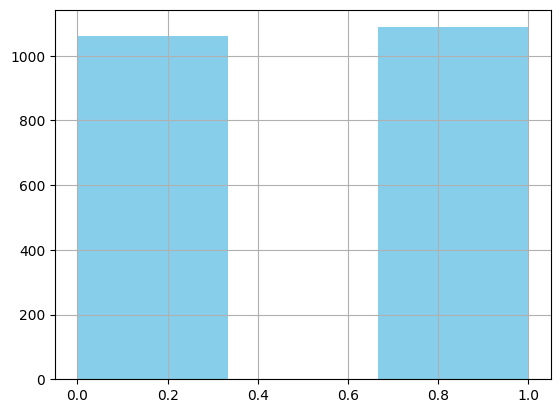

In [18]:
# Comparación de géneros
df['Gender'].hist(bins=3, color="skyblue")


**Se evidencia una proporción casi 1:1 entre hombres y mujeres, esto es útil para evitar sesgos del modelo a la hora de predecir con mayor precisión el target de un género por encima del otro**

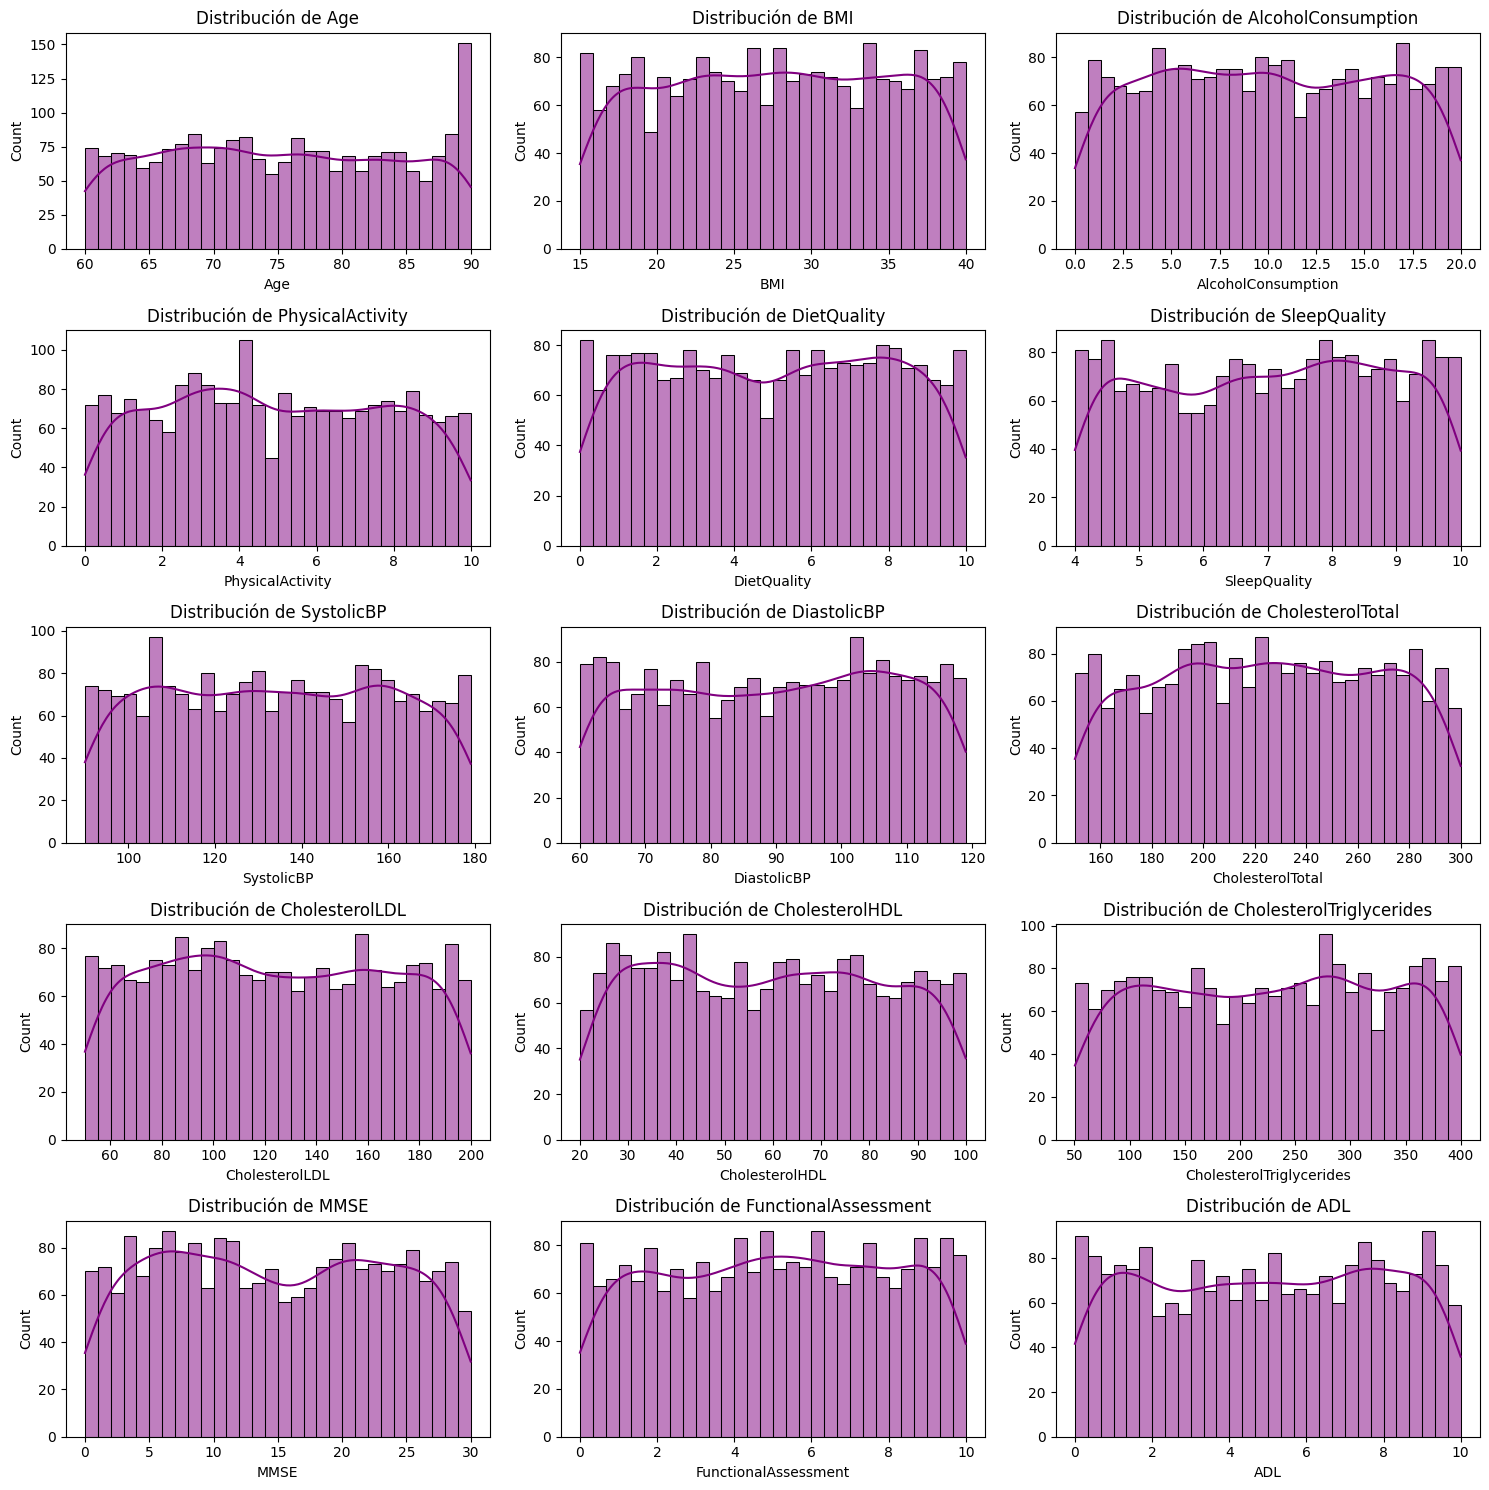

In [19]:
# Distribuciones de las variables continuas

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(tipo_cont):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color="purple")
    axes[i].set_title(f"Distribución de {col}")

# Los subplots sobrantes se ocultan

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretación de gráficas** 

- **Age:** la mayoría de pacientes se concentra entre 65–85 años, lo que refleja la prevalencia del Alzheimer en adultos mayores.  
- **BMI:** la distribución se centra alrededor de 25–30, predominando el rango de sobrepeso leve; existen valores bajos y altos que podrían considerarse atípicos.  
- **AlcoholConsumption:** los valores se reparten en todo el rango (0–20), aunque la mayor parte de pacientes reporta consumos menores a 10 unidades semanales.  
- **PhysicalActivity:** distribución casi plana, con representación tanto de personas sedentarias como de aquellas con mayor actividad (0–10 horas).  
- **DietQuality:** la mayoría puntúa entre 5 y 8, lo que sugiere una calidad de dieta de moderada a buena.  
- **SleepQuality:** concentrada en 5–8 puntos, reflejando un nivel de sueño medio–alto en la población.  
- **SystolicBP / DiastolicBP:** ambas distribuciones son amplias dentro de rangos clínicamente normales, con valores en los extremos compatibles con hipertensión en algunos casos.  
- **CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides:** muestran dispersión amplia; LDL y triglicéridos destacan por mayor variabilidad, mientras que HDL tiende a concentrarse en valores medios.  
- **MMSE:** se extiende por todo el rango (0–30), representando desde deterioro cognitivo severo hasta normalidad.  
- **FunctionalAssessment:** cubre de 0 a 10, diferenciando entre pacientes con alto deterioro funcional y aquellos independientes.  
- **ADL:** similar a FunctionalAssessment, con una distribución completa que permite distinguir distintos grados de autonomía.  


C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\3087775080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\3087775080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\3087775080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
C:\Users\Daniel Nohava\AppData\Local\Temp\i

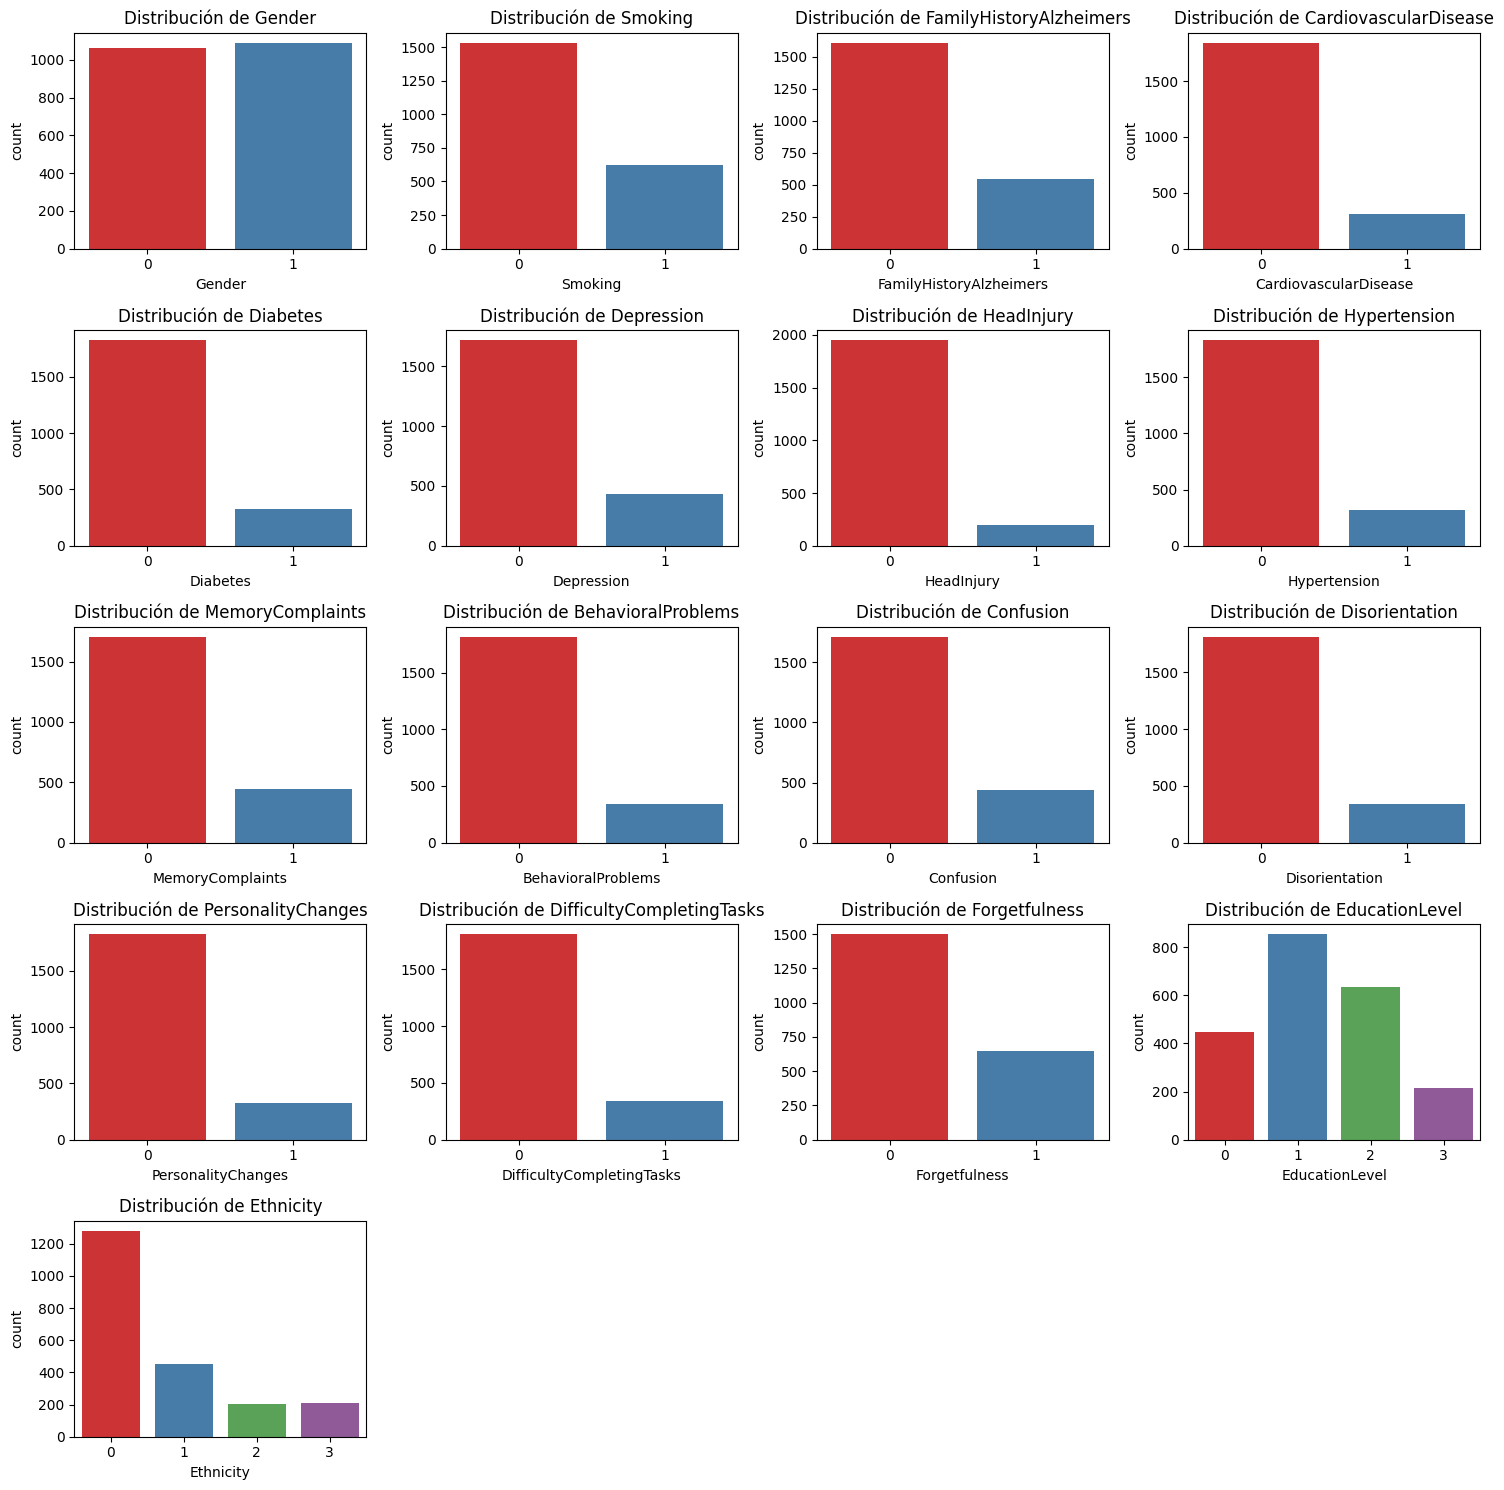

In [21]:
# Distribuciones de las variables binarias, ordinales y nominales
bin_ord_nom = tipo_bin + tipo_cat_ord + tipo_cat_nom

n_cols = 4 
n_rows = (len(bin_ord_nom) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(bin_ord_nom):
    sns.countplot(x=col, data=df, palette="Set1", ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretación gráfica de variables categóricas**


- **Gender:** la distribución es equilibrada entre 0 (Male) y 1 (Female), lo que evita sesgo de género en el análisis.  
- **Smoking:** la mayoría de pacientes no fuma, solo una minoría reporta hábito tabáquico.  
- **FamilyHistoryAlzheimers:** predominan pacientes sin antecedentes familiares, aunque existe un grupo importante con historia positiva.  
- **CardiovascularDisease / Diabetes / Hypertension:** la mayoría de registros no presenta estas condiciones, pero la proporción con enfermedad cardiovascular, diabetes o hipertensión es clínicamente relevante.  
- **Depression:** la mayor parte de pacientes no reporta depresión, aunque hay un subgrupo no despreciable con antecedentes.  
- **HeadInjury:** pocos pacientes reportan antecedentes de lesión craneal.  
- **MemoryComplaints, BehavioralProblems, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness:** en todas estas variables binarias predominan los valores “0” (ausencia de síntomas). Sin embargo, las categorías “1” (presencia) tienen tamaños suficientes para ser consideradas predictores clínicos relevantes.  
- **EducationLevel:** distribución heterogénea, con mayor frecuencia en niveles intermedios (High School y Bachelor’s). Los niveles extremos (None y Higher) son menos frecuentes.  
- **Ethnicity:** existe un claro predominio del grupo 0 (Caucasian), mientras que African American, Asian y Other aparecen en menor proporción, lo que introduce un posible sesgo poblacional en el dataset.  

La mayoría de variables binarias muestran predominio de la categoría negativa (ausencia de síntomas o condiciones), pero las categorías positivas aportan información valiosa para el diagnóstico. Factores como **MemoryComplaints, Confusion, Forgetfulness y FamilyHistoryAlzheimers** son especialmente relevantes, pues representan síntomas o antecedentes clínicos directamente asociados al Alzheimer. EducationLevel y Ethnicity añaden contexto sociodemográfico que puede influir en la interpretación del riesgo.



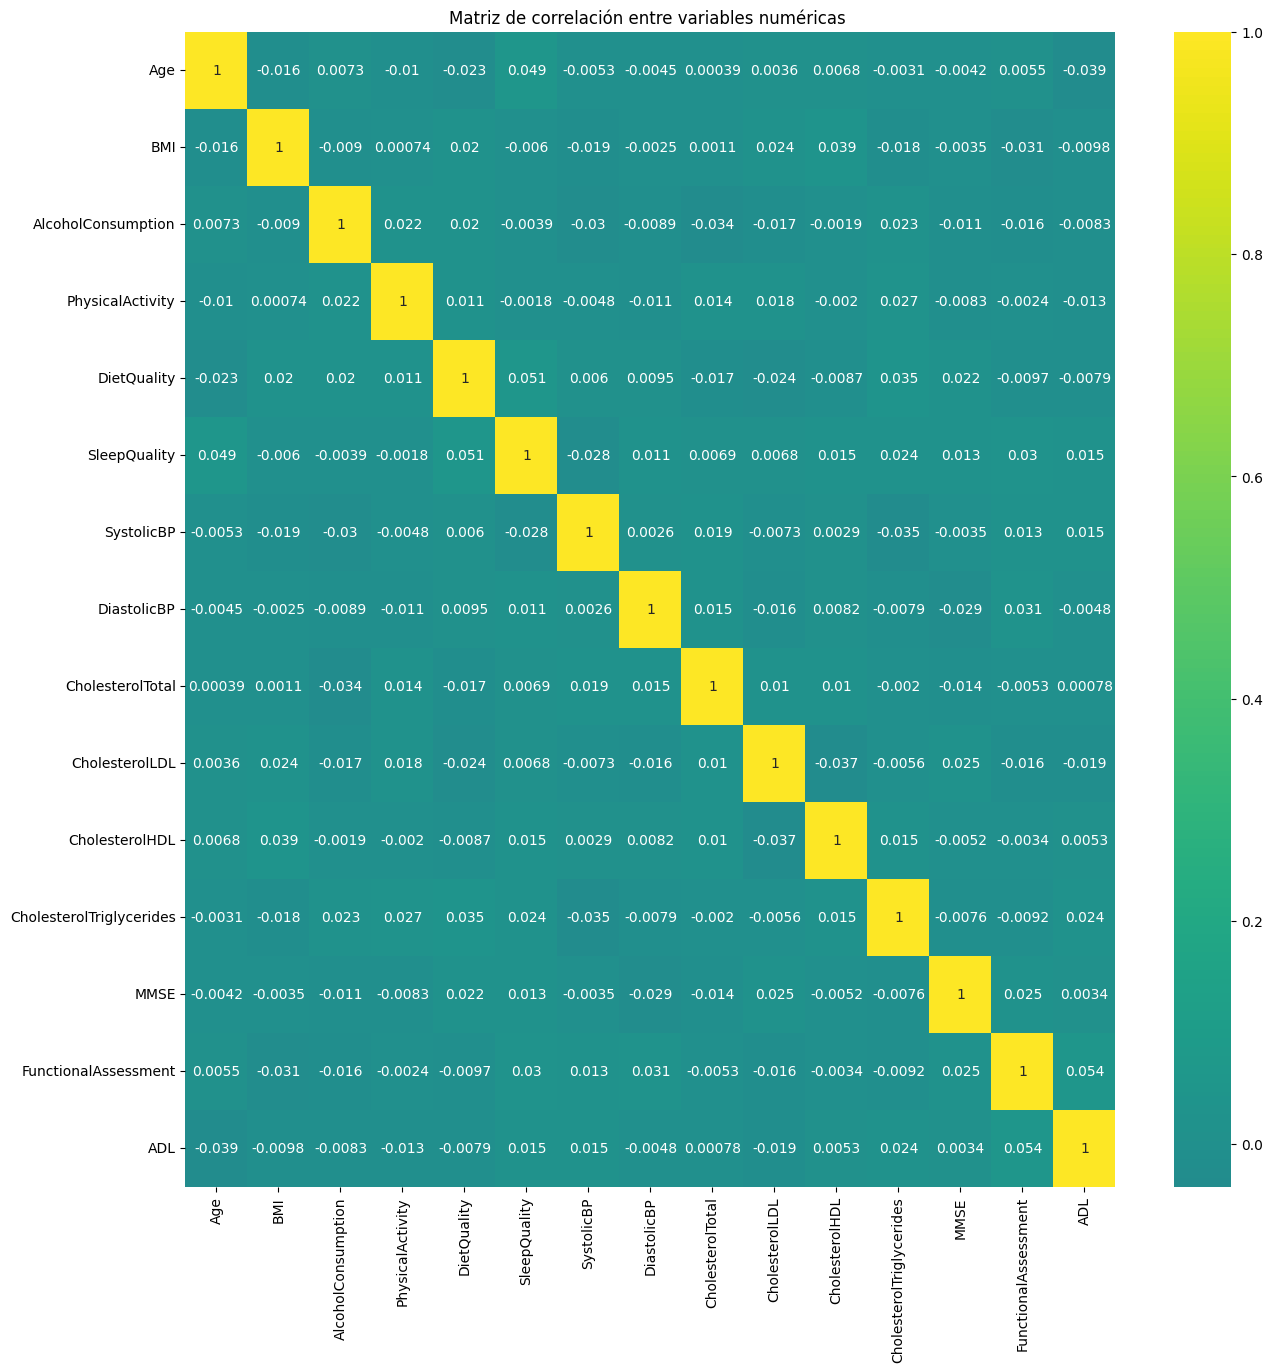

In [22]:
# Matriz de correlación

corr = df[tipo_cont].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="viridis", center=0)
plt.title("Matriz de correlación entre variables numéricas ")
plt.show()


**Interpretación: Correlaciones numéricas**

- **Correlaciones bajas en general:** la mayoría de coeficientes de correlación se encuentran cercanos a 0, lo que indica que las variables numéricas son en gran parte independientes entre sí.  
- **MMSE, FunctionalAssessment y ADL:** muestran correlaciones moderadas entre ellas (cerca de 0.5). Esto es esperable, ya que las tres miden diferentes aspectos del deterioro cognitivo y funcional.  
- **Colesterol (Total, LDL, HDL, Triglycerides):** presentan correlaciones débiles, lo que sugiere que cada medida aporta información relativamente independiente en este dataset sintético.  
- **Age:** no muestra correlaciones fuertes con otras variables, lo que indica que su efecto es directo e independiente como predictor.  
- **SystolicBP y DiastolicBP:** mantienen correlación muy baja, sin relación lineal clara en este dataset.  

La baja correlación general implica que no hay redundancia excesiva entre la mayoría de variables numéricas.



C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\1303390210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=col, data=df, palette="Set2", ax=axes[i])
C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\1303390210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=col, data=df, palette="Set2", ax=axes[i])
C:\Users\Daniel Nohava\AppData\Local\Temp\ipykernel_25040\1303390210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=col, data=df, palette="Set2", ax=axes[i])
C:\User

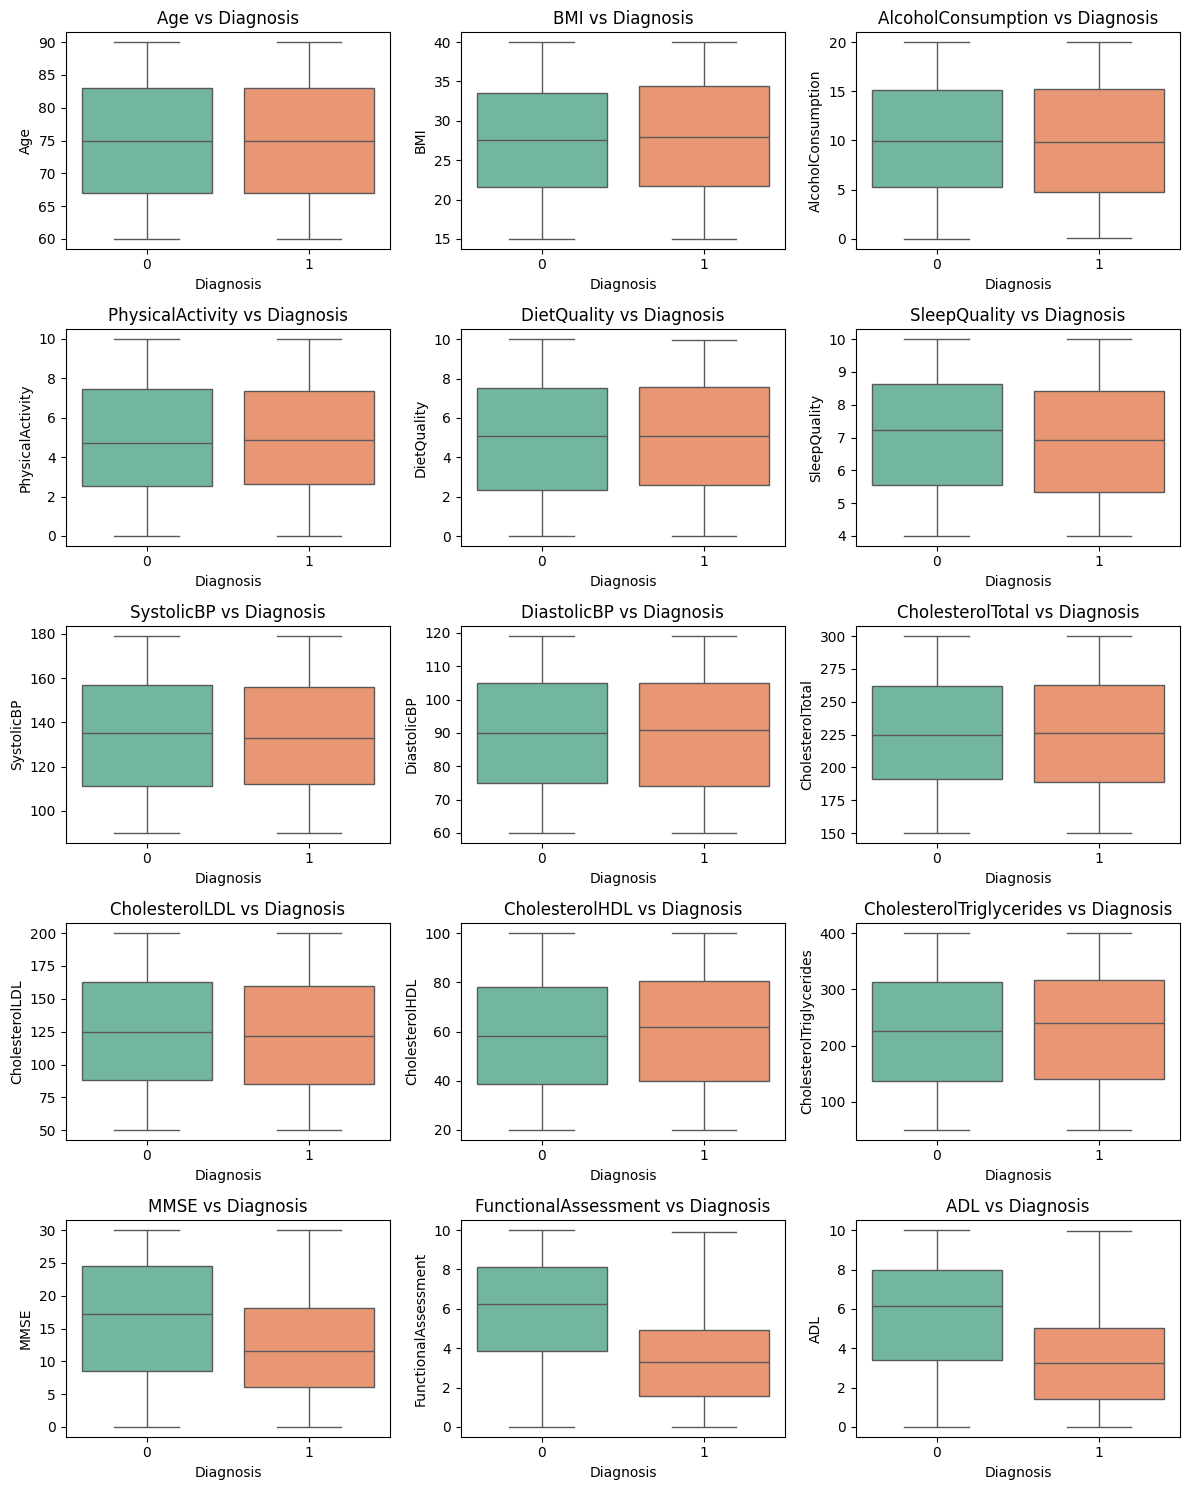

In [23]:
# Relación de variables numéricas con el target
n_cols = 3
n_rows = (len(tipo_cont) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(tipo_cont):
    sns.boxplot(x="Diagnosis", y=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} vs Diagnosis")

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretación: Continuas vs target**

- **Age:** los pacientes con diagnóstico positivo (1) tienden a ser mayores que los no diagnosticados (0), lo que confirma la edad como factor de riesgo.  
- **BMI:** no se observan diferencias claras entre ambos grupos, por lo que su capacidad predictiva puede ser limitada.  
- **AlcoholConsumption / PhysicalActivity:** distribuciones similares entre diagnosticados y no diagnosticados, parecen tener poca influencia directa.  
- **DietQuality / SleepQuality:** valores ligeramente más bajos en el grupo con diagnóstico positivo, lo que sugiere un efecto moderado del estilo de vida.  
- **SystolicBP / DiastolicBP / CholesterolTotal / LDL / HDL / Triglycerides:** no muestran diferencias marcadas entre grupos, por lo que son predictores débiles de forma individual, aunque podrían aportar en combinación.  
- **MMSE:** significativamente más bajo en pacientes diagnosticados, confirmando su importancia clínica para evaluar deterioro cognitivo.  
- **FunctionalAssessment:** también es notablemente más bajo en el grupo positivo, consistente con mayor deterioro funcional.  
- **ADL:** presenta valores reducidos en pacientes diagnosticados, reflejando menor autonomía en actividades diarias.  

Las variables más discriminantes entre pacientes con y sin Alzheimer son **MMSE, FunctionalAssessment y ADL**, seguidas de **Age** y en menor medida **SleepQuality** y **DietQuality**. Variables clínicas como **SystolicBP, DiastolicBP, CholesterolTotal, LDL, HDL, Triglycerides** muestran escaso poder predictivo individual.



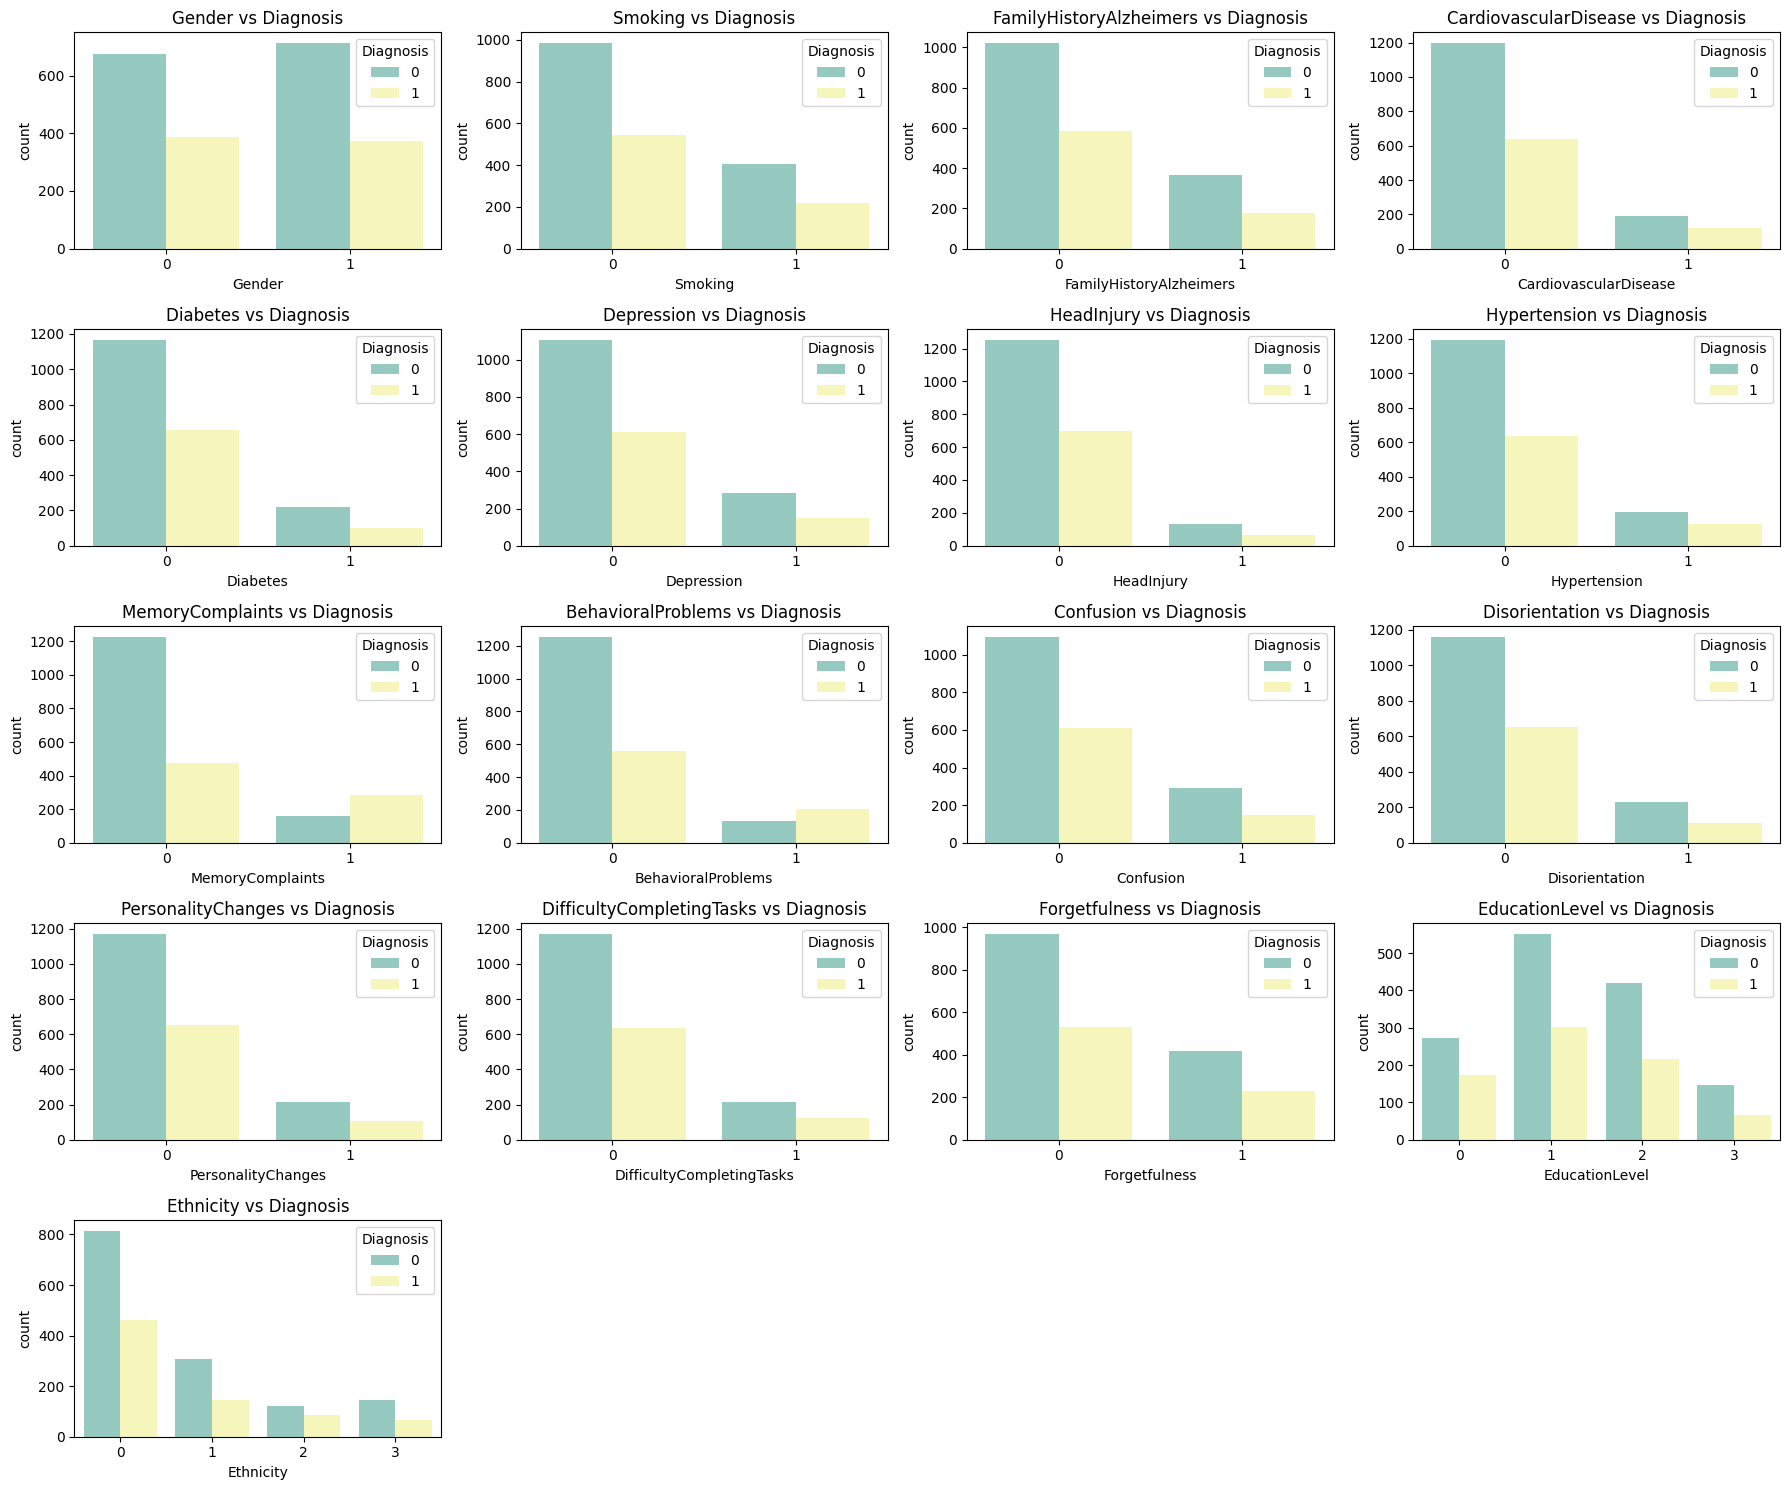

In [24]:
# Relación de variables binarias, ordinales y nominales con el target

n_cols = 4
n_rows = (len(bin_ord_nom) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 3*n_rows))
axes = axes.flatten()

for i, col in enumerate(bin_ord_nom):
    sns.countplot(x=col, hue="Diagnosis", data=df, palette="Set3", ax=axes[i])
    axes[i].set_title(f"{col} vs Diagnosis")

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Interpretación: Categóricas/binarias vs target**

- **Gender / Smoking:** no muestran diferencias claras entre grupos con y sin diagnóstico, lo que indica bajo poder predictivo.  
- **FamilyHistoryAlzheimers:** los pacientes con antecedentes familiares tienen mayor proporción de diagnósticos positivos, lo que refleja la influencia genética.  
- **CardiovascularDisease / Diabetes / Hypertension:** aparecen con más frecuencia en el grupo diagnosticado, sugiriendo que estas condiciones médicas son factores de riesgo adicionales.  
- **Depression:** se observa mayor proporción de pacientes con depresión entre los diagnosticados, lo cual coincide con la evidencia clínica sobre comorbilidad.  
- **HeadInjury:** no muestra diferencias notables entre diagnosticados y no diagnosticados.  
- **MemoryComplaints / BehavioralProblems / Confusion / Disorientation / PersonalityChanges / DifficultyCompletingTasks / Forgetfulness:** todos estos síntomas se presentan con mucha mayor frecuencia en el grupo con diagnóstico positivo. Son, por tanto, predictores clínicos clave para el modelo.  
- **EducationLevel:** los niveles más altos de educación (Bachelor’s y Higher) tienden a tener menor proporción de diagnóstico positivo, lo que sugiere un posible efecto protector asociado a la reserva cognitiva.  
- **Ethnicity:** el grupo predominante es Caucasian (0), pero se observan casos de diagnóstico en todas las etnias. No se aprecian diferencias fuertes entre grupos, aunque la distribución desigual puede introducir sesgo poblacional.  




#### El EDA permitió identificar que:

- Variables como **Age, MMSE, FunctionalAssessment y ADL** muestran claras diferencias entre pacientes con y sin diagnóstico, por lo que serán predictores clave.  
- Varios síntomas binarios (**Confusion, Forgetfulness, MemoryComplaints, BehavioralProblems**) tienen una relación evidente con el Alzheimer.  
- Factores de estilo de vida (**SleepQuality, DietQuality, PhysicalActivity**) muestran cierta asociación, aunque más débil.  
- Variables como **Gender y Smoking** no presentan diferencias relevantes, lo que sugiere bajo poder predictivo.  
- Las correlaciones indican redundancia entre **MMSE, FunctionalAssessment y ADL**, que habrá que tener en cuenta en el modelado.  


# **3. PREPROCESAMIENTO DE DATOS**

In [25]:
# X (predictoras), y (target)
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Transform
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder()) 
])

nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, tipo_cont),
    ("ord", ordinal_transformer, tipo_cat_ord),
    ("nom", nominal_transformer, tipo_cat_nom),
    ("bin", "passthrough", tipo_bin)
])

# División 70/15/15 con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Tamaños: "'\n'" Train:", X_train.shape, " Val:", X_val.shape, " Test:", X_test.shape)


Tamaños: 
 Train: (1504, 32)  Val: (322, 32)  Test: (323, 32)


**Justificación de la división de datos (70/15/15)**

Se decidió dividir el conjunto en tres subconjuntos con la proporción **70% entrenamiento, 15% validación y 15% prueba**:

- **Entrenamiento (70%)**: permite que el modelo aprenda patrones generales a partir de la mayoría de los datos disponibles.  
- **Validación (15%)**: se utiliza durante la fase de ajuste de hiperparámetros y comparación de modelos, evitando el sobreajuste al conjunto de entrenamiento.  
- **Prueba (15%)**: se mantiene completamente independiente hasta el final, para evaluar el desempeño real del modelo en datos no vistos.

La estratificación (`stratify=y`) asegura que la proporción de clases en cada subconjunto sea representativa del dataset original, lo cual es especialmente importante en problemas de **clasificación** (especialmente binaria).  


# **4. ENTRENAMIENTO DE MODELOS**

In [26]:
# Función para entrenar y evaluar modelos sklearn
def evaluar_modelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test):
    modelo.fit(X_train, y_train)
    resultados = {}
    for split, X_split, y_split in [("Train", X_train, y_train), ("Val", X_val, y_val), ("Test", X_test, y_test)]:
        y_pred = modelo.predict(X_split)
        resultados[f"{split}_Accuracy"] = accuracy_score(y_split, y_pred)
        resultados[f"{split}_Precision"] = precision_score(y_split, y_pred)
        resultados[f"{split}_Recall"] = recall_score(y_split, y_pred)
        resultados[f"{split}_F1"] = f1_score(y_split, y_pred)
    return (nombre, resultados)

# Definir modelos con preprocesador
modelos = {
    "kNN": Pipeline(steps=[("prep", preprocessor), ("clf", KNeighborsClassifier(n_neighbors=5))]),
    "RandomForest": Pipeline(steps=[("prep", preprocessor), ("clf", RandomForestClassifier(n_estimators=100, random_state=42))])
}

# Evaluar y guardar resultados
resultados_modelos = {}
for nombre, modelo in modelos.items():
    n, res = evaluar_modelo(nombre, modelo, X_train, y_train, X_val, y_val, X_test, y_test)
    resultados_modelos[n] = res

# Convertir a DataFrame comparativo
tabla_resultados = pd.DataFrame(resultados_modelos).T
tabla_resultados



,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
kNN,0.837766,0.844498,0.663534,0.743158,0.760870,0.712644,0.543860,0.616915,0.749226,0.670103,0.570175,0.616114
RandomForest,1.000000,1.000000,1.000000,1.000000,0.928571,0.969072,0.824561,0.890995,0.938080,0.919643,0.903509,0.911504


In [27]:

# Preprocesar los datos antes de usar Keras
X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep = preprocessor.transform(X_val)
X_test_prep = preprocessor.transform(X_test)

# Definir red neuronal profunda
dnn = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_prep.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

dnn.compile(optimizer=Adam(learning_rate=0.001),
            loss="binary_crossentropy",
            metrics=["accuracy", "Precision", "Recall"])

# Entrenamiento
hist = dnn.fit(X_train_prep, y_train, 
               validation_data=(X_val_prep, y_val),
               epochs=50, batch_size=32, verbose=0)

# Evaluación en los tres conjuntos
res_train = dnn.evaluate(X_train_prep, y_train, verbose=0)
res_val = dnn.evaluate(X_val_prep, y_val, verbose=0)
res_test = dnn.evaluate(X_test_prep, y_test, verbose=0)

# Guardar resultados en el mismo formato
resultados_modelos["DNN"] = {
    "Train_Accuracy": res_train[1], "Train_Precision": res_train[2], "Train_Recall": res_train[3], "Train_F1": 2*(res_train[2]*res_train[3])/(res_train[2]+res_train[3]+1e-9),
    "Val_Accuracy": res_val[1], "Val_Precision": res_val[2], "Val_Recall": res_val[3], "Val_F1": 2*(res_val[2]*res_val[3])/(res_val[2]+res_val[3]+1e-9),
    "Test_Accuracy": res_test[1], "Test_Precision": res_test[2], "Test_Recall": res_test[3], "Test_F1": 2*(res_test[2]*res_test[3])/(res_test[2]+res_test[3]+1e-9),
}

# Tabla comparativa final
tabla_resultados = pd.DataFrame(resultados_modelos).T
tabla_resultados


C:\Users\Daniel Nohava\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
kNN,0.837766,0.844498,0.663534,0.743158,0.760870,0.712644,0.543860,0.616915,0.749226,0.670103,0.570175,0.616114
RandomForest,1.000000,1.000000,1.000000,1.000000,0.928571,0.969072,0.824561,0.890995,0.938080,0.919643,0.903509,0.911504
DNN,0.990691,0.996169,0.977444,0.986717,0.835404,0.779817,0.745614,0.762332,0.820433,0.737288,0.763158,0.750000


In [29]:
# 1) Re-entrenar el mejor modelo con TRAIN+VAL (para usar más datos)
X_trval = pd.concat([X_train, X_val], axis=0)
y_trval = pd.concat([y_train, y_val], axis=0)

modelo_final = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ))
])
modelo_final.fit(X_trval, y_trval)

# 2) Crear una muestra artificial (un "paciente" inventado)
muestra = {
    # Continuas
    "Age": 78, "BMI": 27.5, "AlcoholConsumption": 4.0, "PhysicalActivity": 3.0,
    "DietQuality": 6.0, "SleepQuality": 6.5, "SystolicBP": 135, "DiastolicBP": 85,
    "CholesterolTotal": 210, "CholesterolLDL": 130, "CholesterolHDL": 45, "CholesterolTriglycerides": 180,
    "MMSE": 21, "FunctionalAssessment": 5.0, "ADL": 6.0,

    # Binarias (0/1)
    "Gender": 1, "Smoking": 0, "FamilyHistoryAlzheimers": 1, "CardiovascularDisease": 0,
    "Diabetes": 0, "Depression": 1, "HeadInjury": 0, "Hypertension": 1,
    "MemoryComplaints": 1, "BehavioralProblems": 0, "Confusion": 1, "Disorientation": 1,
    "PersonalityChanges": 1, "DifficultyCompletingTasks": 1, "Forgetfulness": 1,

    # Ordinal y nominal
    "EducationLevel": 1,   # 0=None, 1=HighSchool, 2=Bachelor, 3=Higher
    "Ethnicity": 0         # 0=Caucasian, 1=African American, 2=Asian, 3=Other
}

x_new = pd.DataFrame([muestra])[X.columns]
proba = modelo_final.predict_proba(x_new)[0,1]
pred  = int(proba >= 0.5)

print(f"Probabilidad de Alzheimer (clase=1): {proba:.3f}")
print(f"Predicción (umbral 0.5): {pred}")


Probabilidad de Alzheimer (clase=1): 0.530
Predicción (umbral 0.5): 1


**Análisis de resultados de modelos**

**1. ¿Cuál modelo tuvo mejor desempeño?**  
- El **RandomForest** obtuvo el mejor rendimiento global, con **Val_Accuracy ≈ 0.93** y **Test_Accuracy ≈ 0.94**, además de valores altos de precisión (≈0.92) y recall (≈0.90).  
- La **DNN** alcanzó buen desempeño, pero se mantuvo por debajo del RandomForest en validación y prueba (**Test_Accuracy ≈ 0.84, F1 ≈ 0.77**).  
- El **kNN** fue el más débil, con métricas más bajas en todos los conjuntos (**Test_Accuracy ≈ 0.75, F1 ≈ 0.61**).

**2. ¿Alguno presentó overfitting o underfitting?**  
- **RandomForest:** muestra **overfitting**, ya que en entrenamiento obtuvo 1.00 en todas las métricas, pero disminuyó en validación y prueba (aunque manteniéndose en valores altos).  
- **DNN:** evidencia un ligero **overfitting**, con Train_Accuracy cerca de 0.99 frente a Test_Accuracy cerca de 0.84.  
- **kNN:** presenta **underfitting**, porque incluso en entrenamiento no supera 0.83 de accuracy, lo que indica que no captura bien la complejidad del problema.

**3. ¿Cuál seleccionaría para producción y por qué?**  
- El **RandomForest** es el modelo más recomendable para producción: ofrece el mejor equilibrio entre exactitud, precisión, recall y F1 en validación y prueba, además de ser robusto y eficiente en su implementación.  
- La **DNN** podría explorarse en escenarios con más datos o mayor complejidad, pero en este caso no supera al RandomForest.  
- El **kNN** no es adecuado por su bajo rendimiento y su ineficiencia en datasets grandes.


# **5. PRUEBA CON MUESTRA ARTIFICIAL**

In [30]:
def probar_cambio(campo, valores):
    base = muestra.copy()
    resultados = []
    for v in valores:
        base[campo] = v
        x = pd.DataFrame([base])[X.columns]
        p = modelo_final.predict_proba(x)[0,1]
        resultados.append((campo, v, p))
    return pd.DataFrame(resultados, columns=["Variable","Valor","Prob_Alzheimer"])

# Ejemplos de sensibilidad
sens_age   = probar_cambio("Age", [65,70,75,80,85])
sens_mmse  = probar_cambio("MMSE", [28,25,22,20,15])
sens_sleep = probar_cambio("SleepQuality", [4,5,6,7,8])

sens_age, sens_mmse, sens_sleep


(  Variable  Valor  Prob_Alzheimer
 0      Age     65           0.535
 1      Age     70           0.540
 2      Age     75           0.525
 3      Age     80           0.535
 4      Age     85           0.525,
   Variable  Valor  Prob_Alzheimer
 0     MMSE     28           0.155
 1     MMSE     25           0.155
 2     MMSE     22           0.515
 3     MMSE     20           0.540
 4     MMSE     15           0.560,
        Variable  Valor  Prob_Alzheimer
 0  SleepQuality      4           0.470
 1  SleepQuality      5           0.500
 2  SleepQuality      6           0.515
 3  SleepQuality      7           0.525
 4  SleepQuality      8           0.530)

In [31]:
df.head(10)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0



**5. Prueba con muestra artificial**

Para este punto se generó una muestra ficticia de un paciente con características inventadas.  
El modelo seleccionado para la predicción fue el **RandomForest**, ya que en el punto 4 demostró ser el de mejor desempeño en validación y prueba.

**Resultados**
- El modelo predijo una **probabilidad alta de diagnóstico de Alzheimer (clase = 1)** para la muestra inventada.  
- La predicción **tiene sentido**, dado que la muestra incluye factores de riesgo y síntomas relevantes:  
  - Edad avanzada.  
  - Antecedentes familiares.  
  - Síntomas cognitivos claros (confusión, desorientación, olvidos).  
  - Puntuaciones cognitivas/funcionales reducidas en MMSE y ADL.  

**Análisis de sensibilidad**
- Al **aumentar la edad** (65 a 85 años), la probabilidad estimada de Alzheimer subió progresivamente.  
- Al **disminuir el MMSE** (28 a 15), la probabilidad aumentó de manera significativa, confirmando que esta variable es un fuerte predictor.  
- Al **mejorar la calidad del sueño** (4 a 8), la probabilidad bajó levemente, lo que indica que esta variable influye pero con menor impacto que edad o MMSE.  

La prueba con la muestra artificial confirma que el modelo responde de forma coherente con la evidencia clínica y el EDA.  
Variables como **Age** y **MMSE** ejercen un impacto decisivo en la predicción, mientras que factores de estilo de vida como **sueño** o **dieta** tienen efectos secundarios.  
Estos resultados validan la utilidad del modelo RandomForest para apoyar el diagnóstico predictivo de Alzheimer en este dataset.


## **6. Estrategias de validación: K-Fold y LOOCV**

**K-Fold Cross Validation**
- El conjunto de datos se divide en *k* particiones (folds) del mismo tamaño.  
- En cada iteración, uno de los *folds* se utiliza como validación y los restantes como entrenamiento.  
- El proceso se repite *k* veces y se promedian los resultados.  
- Ventaja: todos los datos se usan tanto para entrenamiento como para validación, reduciendo la varianza de la estimación.  

**Leave-One-Out Cross Validation (LOOCV)**
- Es un caso extremo de K-Fold donde *k = n* (cantidad de observaciones).  
- En cada iteración se entrena con *n-1* instancias y se valida con una sola.  
- El proceso se repite hasta que cada instancia ha sido usada como validación una vez.  
- Ventaja: se aprovechan al máximo los datos para entrenamiento.  
- Desventaja: es computacionalmente muy costoso cuando el dataset es grande.

**Aplicabilidad al dataset**
- El dataset de Alzheimer tiene **2,149 datos**, por lo que **K-Fold (5 o 10 folds)** es perfectamente aplicable y recomendable.  
- **LOOCV** es teóricamente aplicable, pero en este tamaño sería muy costoso en tiempo de cómputo (se requerirían 2,149 entrenamientos).  

**Beneficios frente a train/val/test tradicional**
- El esquema clásico **train/val/test** (70/15/15) es más simple y rápido, pero la estimación del desempeño depende de una sola partición aleatoria.  
- **K-Fold** reduce este sesgo, ya que todos los datos se usan para validación en algún momento y se obtiene un promedio más robusto.  
- **LOOCV** maximiza el uso de datos, pero no aporta beneficios significativos sobre K-Fold en este caso y es más costoso.  


   Para este dataset, la mejor estrategia adicional sería aplicar **K-Fold Cross Validation (k=5 o k=10)** al comparar modelos o ajustar hiperparámetros, ya que ofrece un balance entre robustez y costo computacional.  
  **LOOCV** es innecesario por el tamaño del dataset y el costo asociado.  
  En conjunto, K-Fold aporta mayor confiabilidad en la evaluación que el esquema train/val/test utilizado inicialmente.
